In [5]:
import os
import sys

# Step 1: Get the parent directory of your current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Step 2: Add project root to sys.path if not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Step 3: Confirm
print("Project root added to sys.path:", project_root in sys.path)
print("src.data_loader readable:", os.path.exists(os.path.join(project_root, "src", "data_loader.py")))



Project root added to sys.path: True
src.data_loader readable: True


In [11]:
# Section 1: Imports and Setup
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.data_loader as data_loader
import src.eda as eda
from scipy import stats  # Added this import
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_theme()

In [8]:
# Section 2: Data Loading & Initial Inspection
# Load and clean the data
df = data_loader.load_data('../data/MachineLearningRating_v3.txt')
df = data_loader.clean_data(df)

# Display basic information
print("Dataset Info:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nFirst 5 rows:")
display(df.head())

# Check data types and missing values
print("\nData Types and Missing Values:")
display(pd.DataFrame({
    'dtype': df.dtypes,
    'missing_values': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df) * 100).round(2)
}))

c:\Users\tesfa\Desktop\Kiffiya AI\Insurance_Risk_Analytics\src\data_loader.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\tesfa\Desktop\Kiffiya AI\Insurance_Risk_Analytics\src\data_loader.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Dataset Info:
Number of rows: 1000098
Number of columns: 52

First 5 rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



Data Types and Missing Values:


,dtype,missing_values,missing_percentage
UnderwrittenCoverID,int64,0,0.00
PolicyID,int64,0,0.00
TransactionMonth,datetime64[ns],0,0.00
IsVATRegistered,bool,0,0.00
Citizenship,object,0,0.00
LegalType,object,0,0.00
Title,object,0,0.00
Language,object,0,0.00
Bank,object,145961,14.59
AccountType,object,40232,4.02


In [23]:
# Section 2: Data Summarization & Structure
# Descriptive Statistics
print("Descriptive Statistics for Key Financial Variables:")
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
desc_stats = df[numeric_cols].describe()
display(desc_stats)

# Data Structure
print("\nData Types and Structure:")
print("\nCategorical Variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Sample values: {df[col].unique()[:5]}")

# Data Quality Assessment
print("\nMissing Values Analysis:")
missing_info = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(missing_info[missing_info['missing_count'] > 0])

Descriptive Statistics for Key Financial Variables:


,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,2.212193e+05
std,2.302845e+02,2.384075e+03,2.650521e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,2.200000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.200000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07



Data Types and Structure:

Categorical Variables:

Citizenship:
Unique values: 4
Sample values: ['  ' 'AF' 'ZA' 'ZW']

LegalType:
Unique values: 6
Sample values: ['Close Corporation' 'Individual' 'Partnership' 'Private company'
 'Public company']

Title:
Unique values: 5
Sample values: ['Mr' 'Dr' 'Miss' 'Mrs' 'Ms']

Language:
Unique values: 1
Sample values: ['English']

Bank:
Unique values: 11
Sample values: ['First National Bank' 'Standard Bank' nan 'ABSA Bank' 'Capitec Bank']

AccountType:
Unique values: 3
Sample values: ['Current account' 'Savings account' nan 'Transmission account']

MaritalStatus:
Unique values: 3
Sample values: ['Not specified' 'Married' 'Single' nan]

Gender:
Unique values: 3
Sample values: ['Not specified' 'Male' 'Female' nan]

Country:
Unique values: 1
Sample values: ['South Africa']

Province:
Unique values: 9
Sample values: ['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape']

MainCrestaZone:
Unique values: 16
Sample values: ['Rand East' '

,missing_count,missing_percentage
Bank,145961,14.59
AccountType,40232,4.02
MaritalStatus,8259,0.83
Gender,9536,0.95
VehicleType,552,0.06
make,552,0.06
Model,552,0.06
bodytype,552,0.06
VehicleIntroDate,552,0.06
CapitalOutstanding,2,0.00


Portfolio Overview:
Total Premium: 61,911,562.70
Total Claims: 64,867,546.17
Overall Loss Ratio: 1.05
Average Premium: 61.91
Average Claim: 64.86


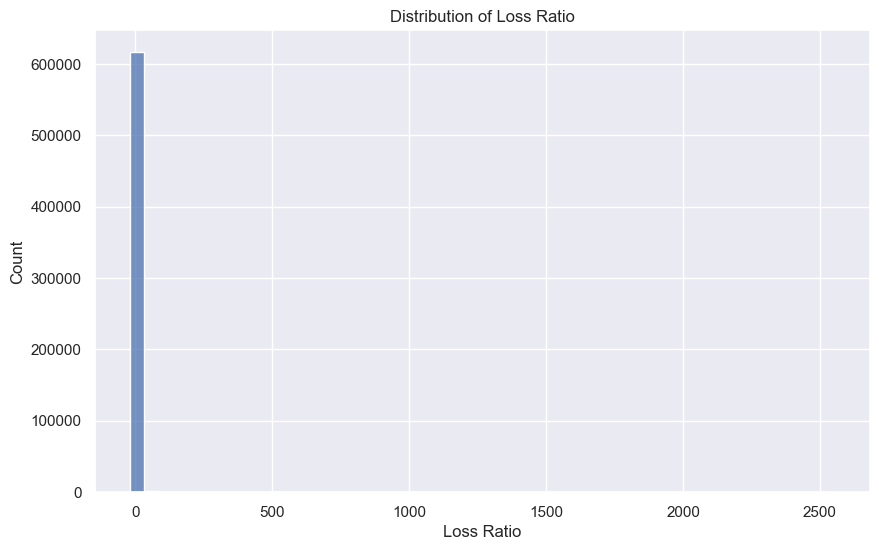

In [12]:
# Section 3: Key Financial Metrics Analysis
# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Overall portfolio metrics
portfolio_metrics = {
    'Total Premium': df['TotalPremium'].sum(),
    'Total Claims': df['TotalClaims'].sum(),
    'Overall Loss Ratio': df['TotalClaims'].sum() / df['TotalPremium'].sum(),
    'Average Premium': df['TotalPremium'].mean(),
    'Average Claim': df['TotalClaims'].mean()
}

print("Portfolio Overview:")
for metric, value in portfolio_metrics.items():
    print(f"{metric}: {value:,.2f}")

# Visualize Loss Ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LossRatio', bins=50)
plt.title('Distribution of Loss Ratio')
plt.xlabel('Loss Ratio')
plt.ylabel('Count')
plt.show()

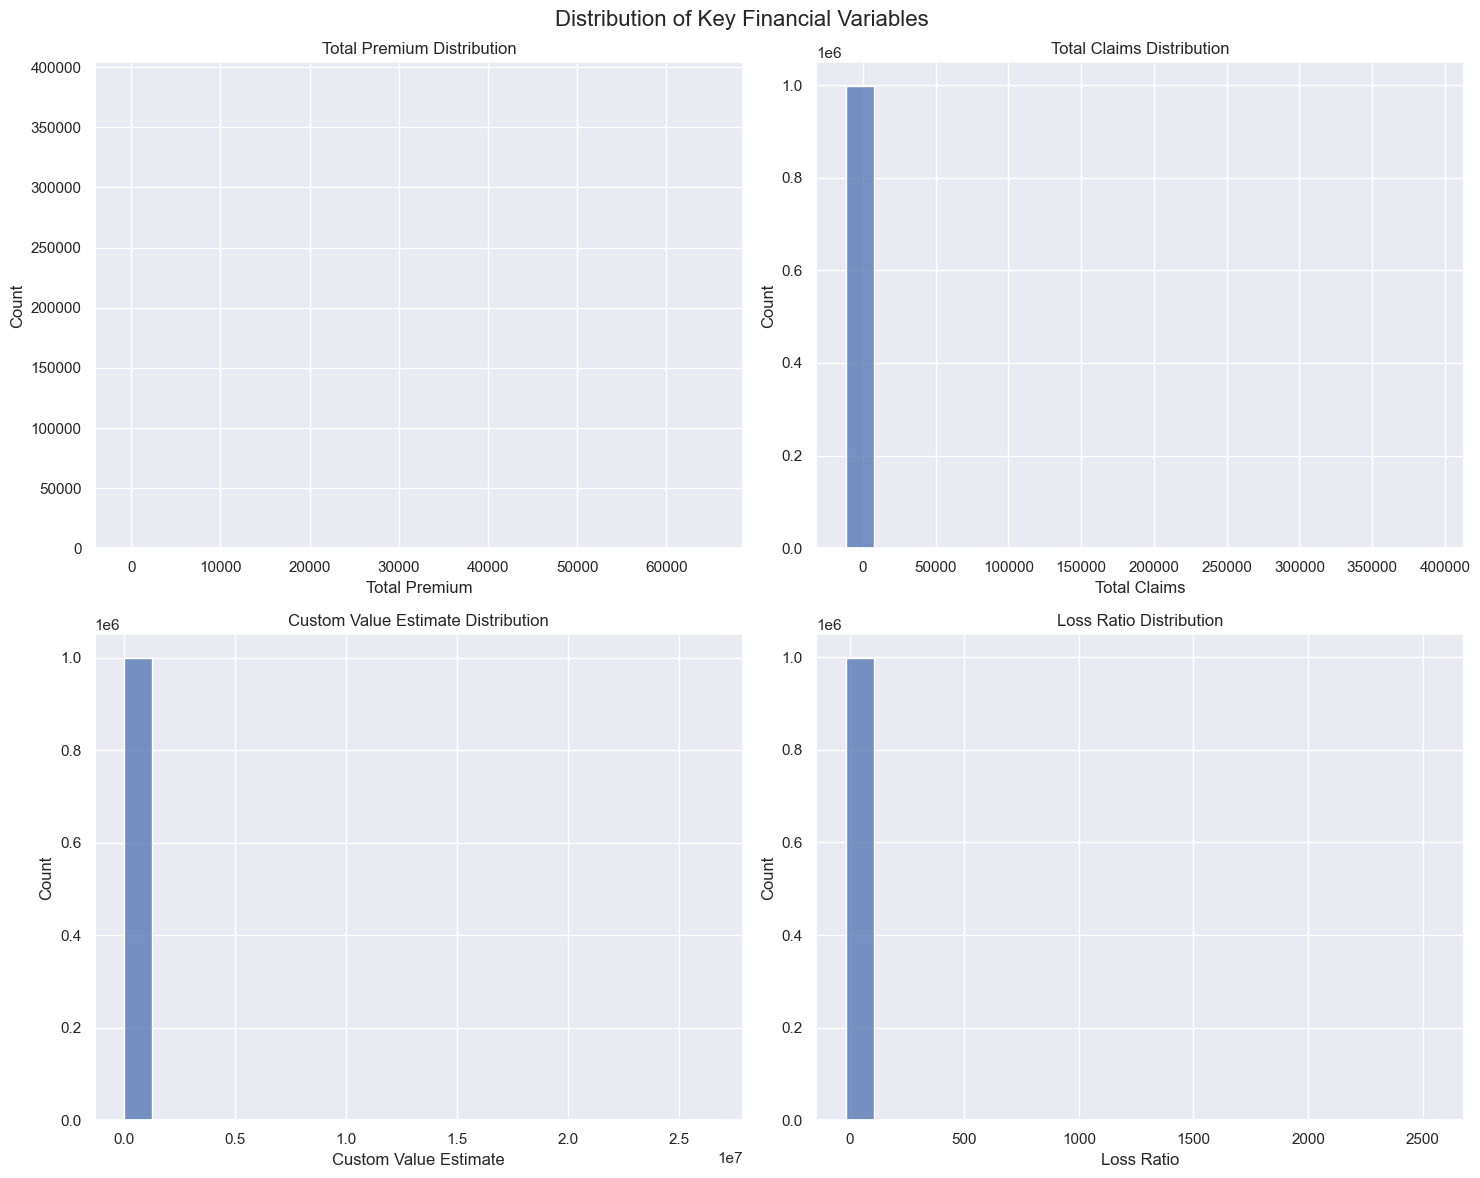

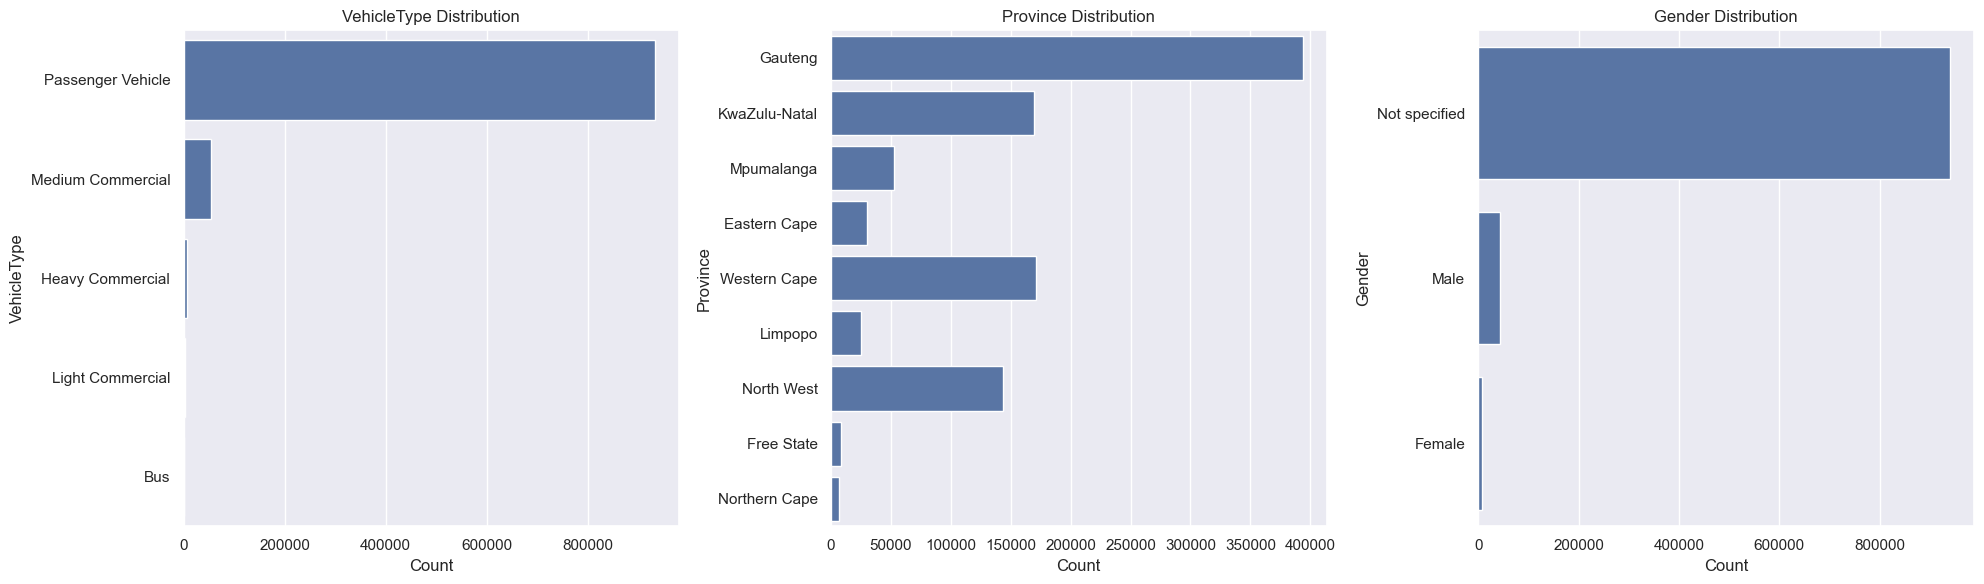

In [24]:

# Distribution of Key Financial Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Financial Variables', size=16)

# TotalPremium Distribution
sns.histplot(data=df, x='TotalPremium', ax=axes[0,0])
axes[0,0].set_title('Total Premium Distribution')
axes[0,0].set_xlabel('Total Premium')

# TotalClaims Distribution
sns.histplot(data=df, x='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('Total Claims Distribution')
axes[0,1].set_xlabel('Total Claims')

# CustomValueEstimate Distribution
sns.histplot(data=df, x='CustomValueEstimate', ax=axes[1,0])
axes[1,0].set_title('Custom Value Estimate Distribution')
axes[1,0].set_xlabel('Custom Value Estimate')

# LossRatio Distribution
sns.histplot(data=df, x='LossRatio', ax=axes[1,1])
axes[1,1].set_title('Loss Ratio Distribution')
axes[1,1].set_xlabel('Loss Ratio')

plt.tight_layout()
plt.show()

# Categorical Variables Distribution
categorical_cols = ['VehicleType', 'Province', 'Gender']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Section 4: Bivariate Analysis
# Correlation Matrix
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Key Financial Variables')
plt.tight_layout()
plt.show()

# Scatter plot matrix
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.show()

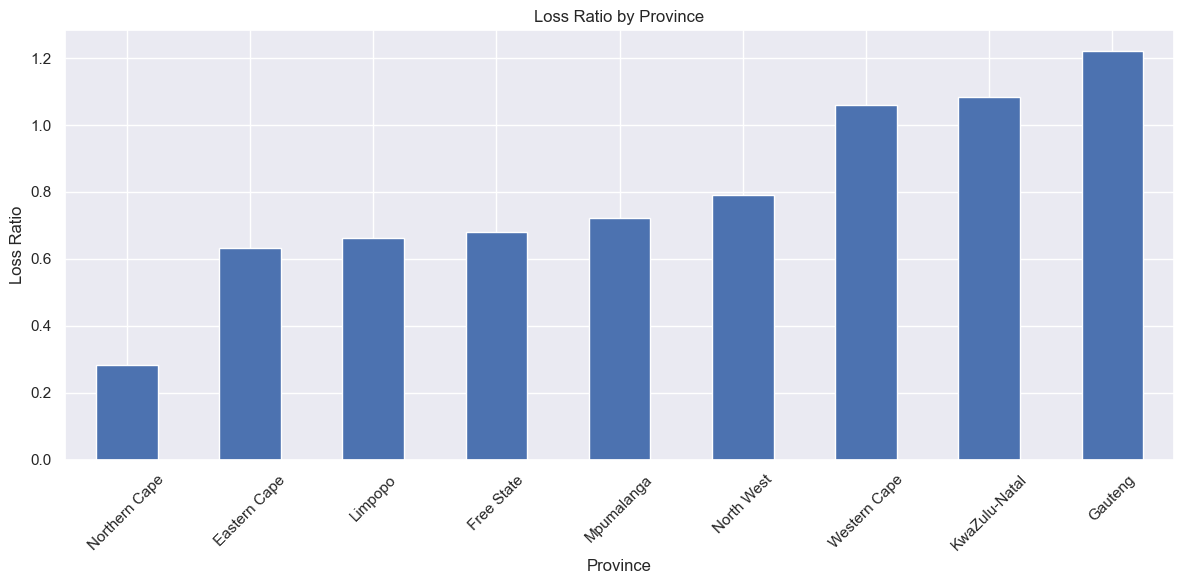


ANOVA Test for Province Differences:
F-statistic: nan
p-value: nan


In [13]:
# Section 4: Geographic Analysis
# Loss Ratio by Province
province_analysis = df.groupby('Province').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).assign(
    LossRatio=lambda x: x['TotalClaims'] / x['TotalPremium'],
    ClaimFrequency=lambda x: x['TotalClaims'] / x['PolicyID']
)

# Visualize Loss Ratio by Province
plt.figure(figsize=(12, 6))
province_analysis['LossRatio'].sort_values().plot(kind='bar')
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.ylabel('Loss Ratio')
plt.tight_layout()
plt.show()

# Statistical test for province differences
provinces = df['Province'].unique()
province_loss_ratios = [df[df['Province'] == p]['LossRatio'] for p in provinces]
f_stat, p_value = stats.f_oneway(*province_loss_ratios)
print(f"\nANOVA Test for Province Differences:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")

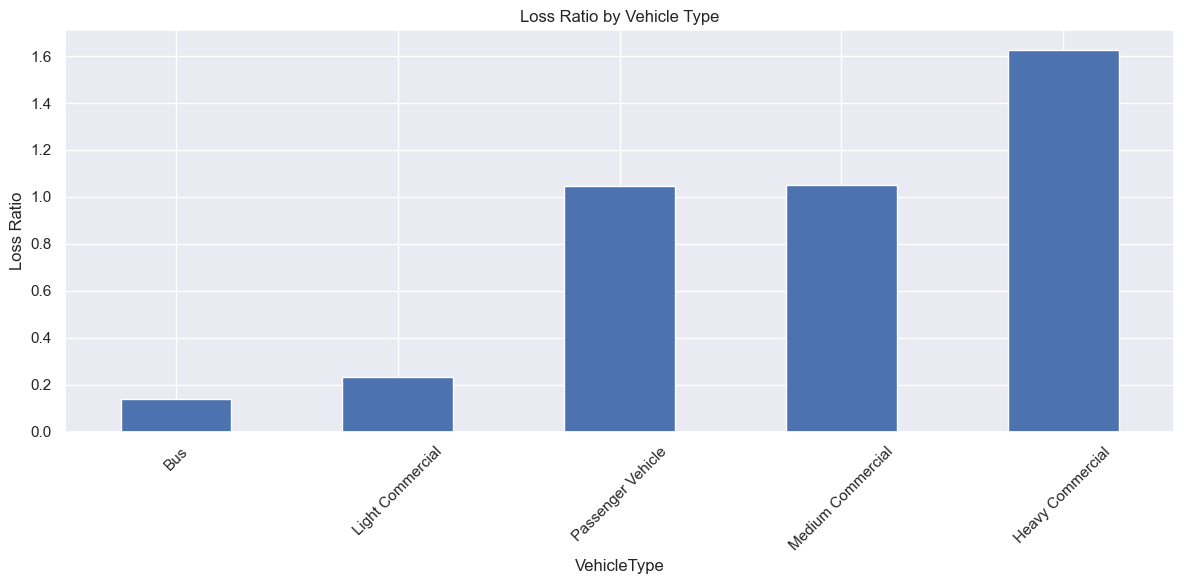

KeyError: 'Make'

In [14]:
# Section 5: Vehicle Analysis
# Analyze by Vehicle Type
vehicle_type_analysis = df.groupby('VehicleType').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).assign(
    LossRatio=lambda x: x['TotalClaims'] / x['TotalPremium'],
    ClaimFrequency=lambda x: x['TotalClaims'] / x['PolicyID']
)

# Visualize Loss Ratio by Vehicle Type
plt.figure(figsize=(12, 6))
vehicle_type_analysis['LossRatio'].sort_values().plot(kind='bar')
plt.title('Loss Ratio by Vehicle Type')
plt.xticks(rotation=45)
plt.ylabel('Loss Ratio')
plt.tight_layout()
plt.show()

# Analyze by Make and Model
make_model_analysis = df.groupby(['Make', 'Model']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).assign(
    LossRatio=lambda x: x['TotalClaims'] / x['TotalPremium'],
    AvgClaimAmount=lambda x: x['TotalClaims'] / x['PolicyID']
)

# Top 10 vehicles by claim amount
print("\nTop 10 Vehicles by Average Claim Amount:")
display(make_model_analysis.sort_values('AvgClaimAmount', ascending=False).head(10))

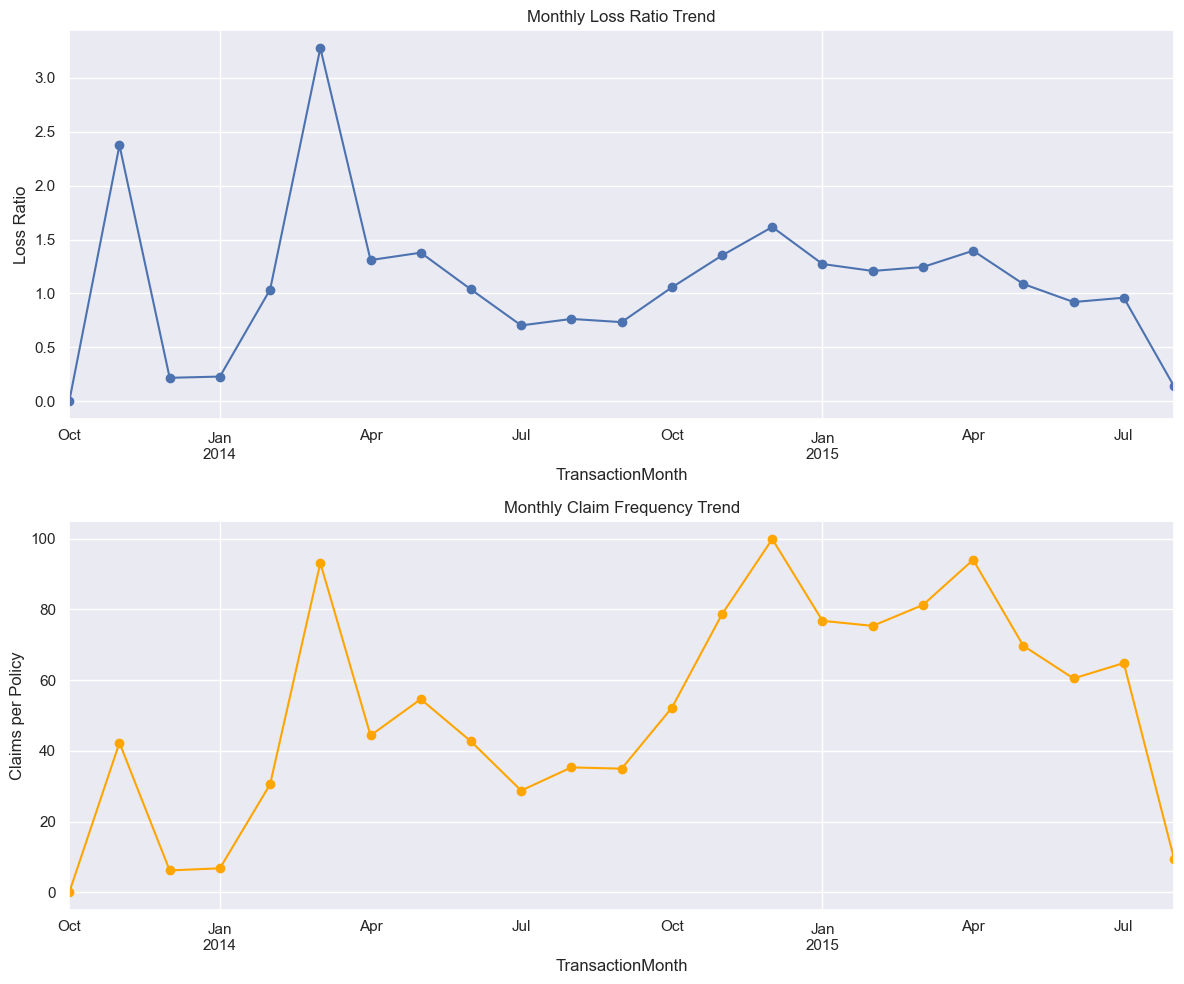

In [15]:
# Section 6: Temporal Analysis
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Monthly trends
monthly_trends = df.groupby('TransactionMonth').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).assign(
    LossRatio=lambda x: x['TotalClaims'] / x['TotalPremium'],
    ClaimFrequency=lambda x: x['TotalClaims'] / x['PolicyID']
)

# Plot monthly trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Loss Ratio trend
monthly_trends['LossRatio'].plot(ax=ax1, marker='o')
ax1.set_title('Monthly Loss Ratio Trend')
ax1.set_ylabel('Loss Ratio')
ax1.grid(True)

# Claim Frequency trend
monthly_trends['ClaimFrequency'].plot(ax=ax2, marker='o', color='orange')
ax2.set_title('Monthly Claim Frequency Trend')
ax2.set_ylabel('Claims per Policy')
ax2.grid(True)

plt.tight_layout()
plt.show()

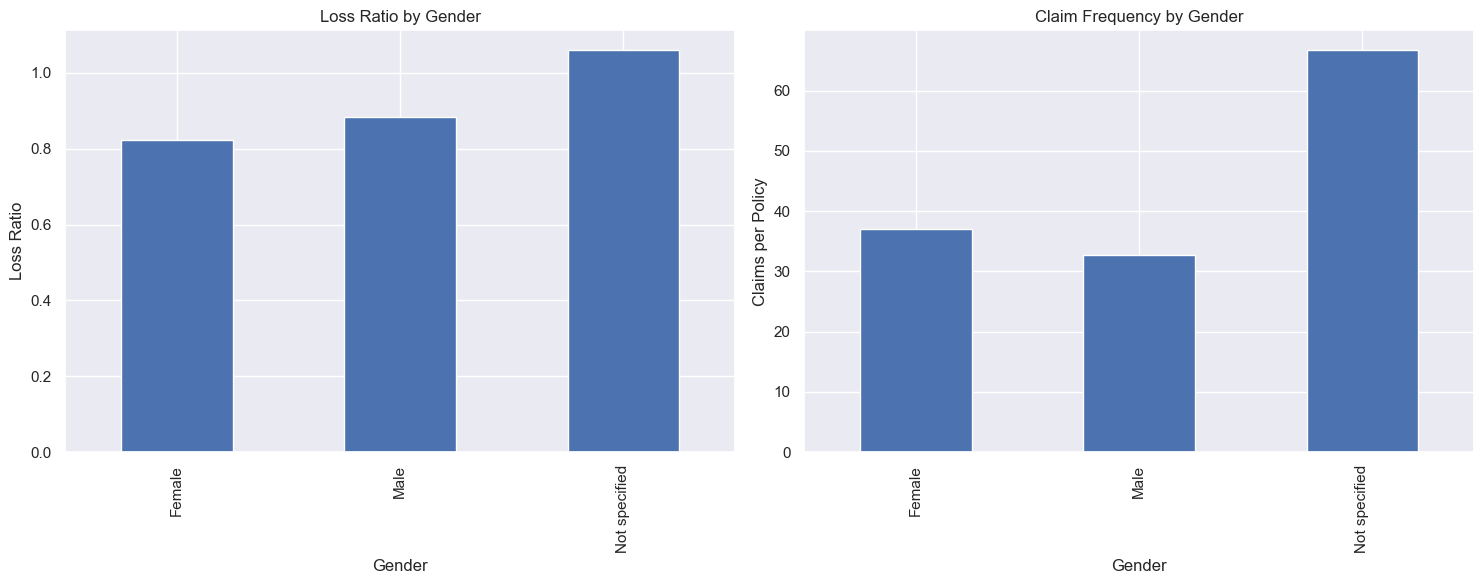

AxisError: `axis` must be an integer, a tuple of integers, or `None`.

In [16]:
# Section 7: Gender Analysis
# Analyze by Gender
gender_analysis = df.groupby('Gender').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).assign(
    LossRatio=lambda x: x['TotalClaims'] / x['TotalPremium'],
    ClaimFrequency=lambda x: x['TotalClaims'] / x['PolicyID']
)

# Visualize Gender differences
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loss Ratio by Gender
gender_analysis['LossRatio'].plot(kind='bar', ax=ax1)
ax1.set_title('Loss Ratio by Gender')
ax1.set_ylabel('Loss Ratio')

# Claim Frequency by Gender
gender_analysis['ClaimFrequency'].plot(kind='bar', ax=ax2)
ax2.set_title('Claim Frequency by Gender')
ax2.set_ylabel('Claims per Policy')

plt.tight_layout()
plt.show()

# Statistical test for gender differences
gender_groups = df['Gender'].unique()
gender_loss_ratios = [df[df['Gender'] == g]['LossRatio'] for g in gender_groups]
t_stat, p_value = stats.ttest_ind(*gender_loss_ratios)
print(f"\nT-test for Gender Differences:")
print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

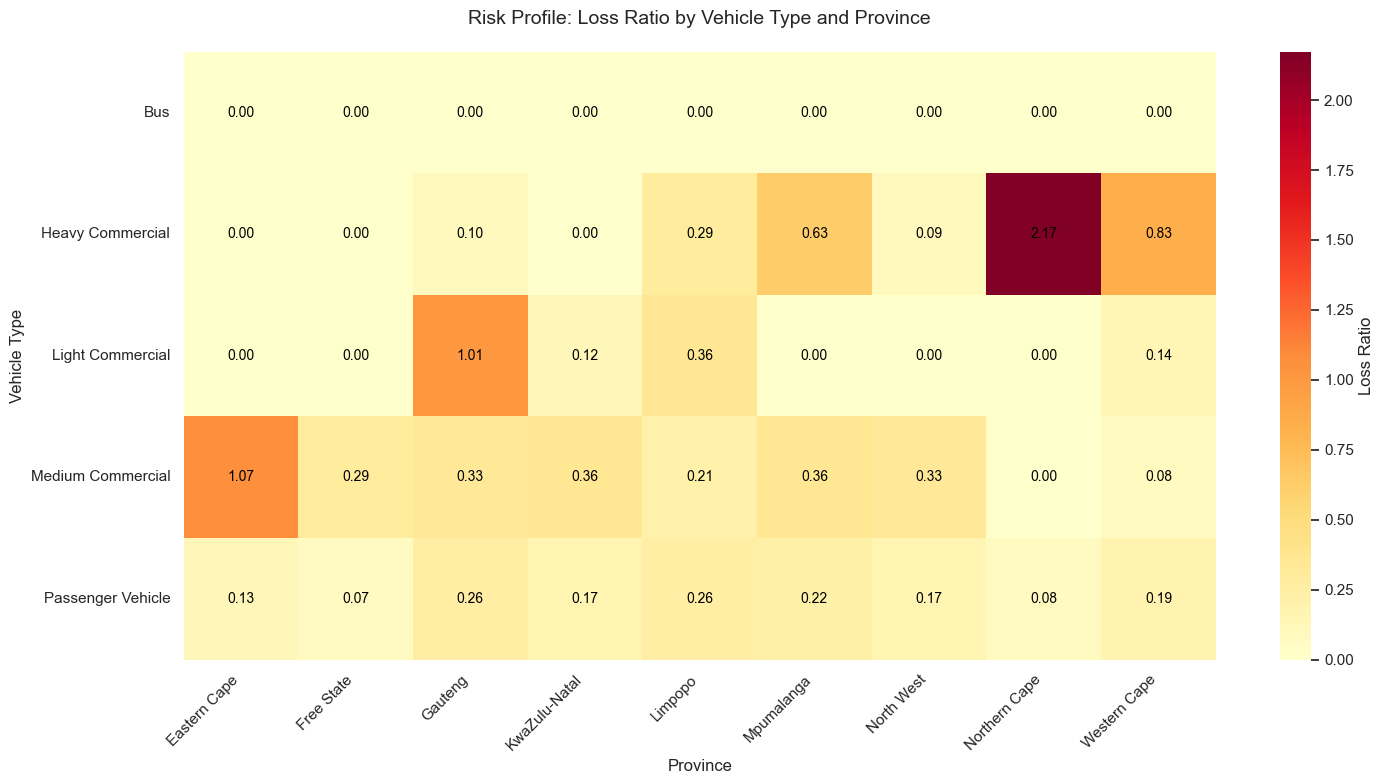


Heatmap Explanation:
This heatmap shows the average Loss Ratio (TotalClaims/TotalPremium) for each combination of Vehicle Type and Province.
Darker colors indicate higher Loss Ratios (higher risk), while lighter colors indicate lower Loss Ratios (lower risk).

Key Statistics:
Highest Risk: 2.17
Lowest Risk: 0.00
Average Risk: 0.23

Additional Insights:
Number of Vehicle Types: 5
Number of Provinces: 9
Number of zero-risk combinations: 18


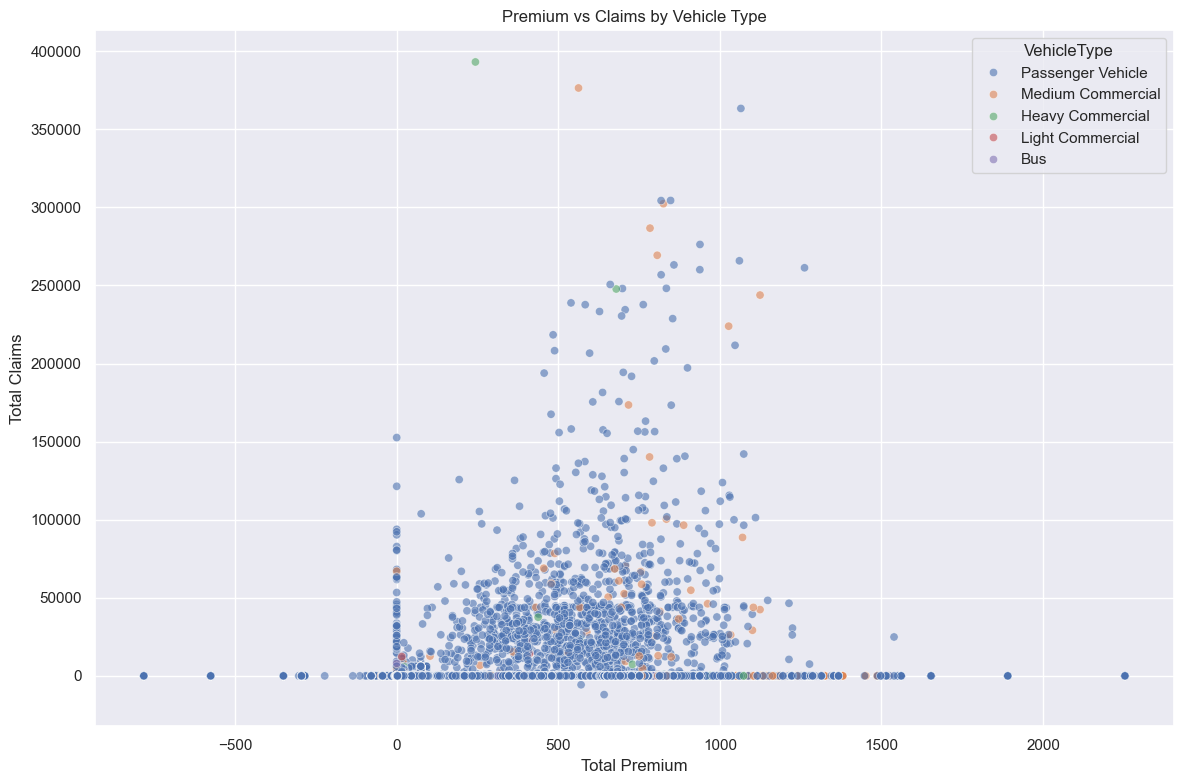

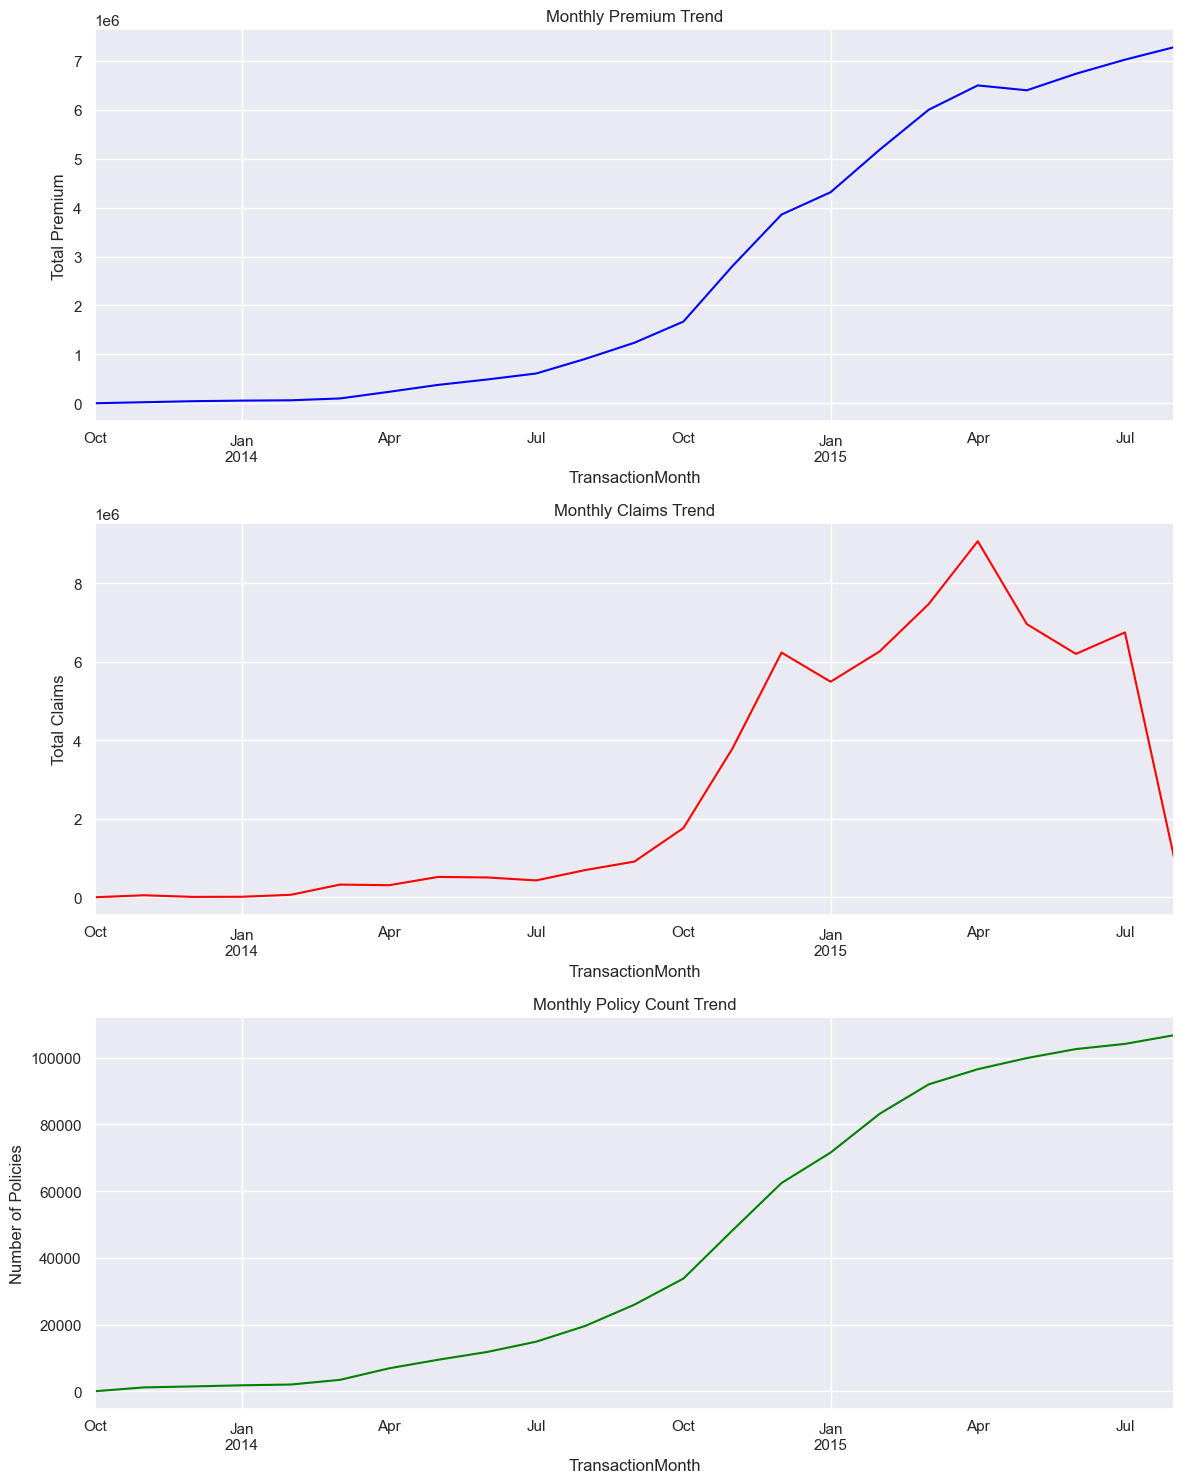

In [22]:
# Section 8: Creative Visualizations
# 1. Risk Profile Heatmap
try:
    # First, let's handle the LossRatio calculation properly
    df['LossRatio'] = df.apply(
        lambda x: x['TotalClaims'] / x['TotalPremium'] if x['TotalPremium'] > 0 else 0, 
        axis=1
    )
    
    # Create the pivot table
    risk_profile = df.pivot_table(
        values='LossRatio',
        index='VehicleType',
        columns='Province',
        aggfunc='mean',
        fill_value=0
    )
    
    # Create the heatmap with better colors and annotations
    plt.figure(figsize=(15, 8))
    sns.heatmap(risk_profile, 
                cmap='YlOrRd',  # Yellow to Orange to Red
                annot=True,     # Show numbers
                fmt='.2f',      # Format numbers to 2 decimal places
                annot_kws={'color': 'black', 'size': 10},
                cbar_kws={'label': 'Loss Ratio'})
    
    plt.title('Risk Profile: Loss Ratio by Vehicle Type and Province', pad=20, size=14)
    plt.xlabel('Province', size=12)
    plt.ylabel('Vehicle Type', size=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print explanation and statistics
    print("\nHeatmap Explanation:")
    print("This heatmap shows the average Loss Ratio (TotalClaims/TotalPremium) for each combination of Vehicle Type and Province.")
    print("Darker colors indicate higher Loss Ratios (higher risk), while lighter colors indicate lower Loss Ratios (lower risk).")
    
    # Calculate statistics excluding inf values
    valid_ratios = risk_profile[risk_profile != np.inf].replace(np.nan, 0)
    print("\nKey Statistics:")
    print(f"Highest Risk: {valid_ratios.max().max():.2f}")
    print(f"Lowest Risk: {valid_ratios.min().min():.2f}")
    print(f"Average Risk: {valid_ratios.mean().mean():.2f}")
    
    # Print some additional insights
    print("\nAdditional Insights:")
    print(f"Number of Vehicle Types: {len(risk_profile.index)}")
    print(f"Number of Provinces: {len(risk_profile.columns)}")
    print(f"Number of zero-risk combinations: {(risk_profile == 0).sum().sum()}")
    
except Exception as e:
    print(f"Error creating heatmap: {str(e)}")
    print("\nFirst few rows of the data:")
    print(df[['VehicleType', 'Province', 'TotalClaims', 'TotalPremium', 'LossRatio']].head())

# 2. Premium vs Claims Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', 
                hue='VehicleType', alpha=0.6)
plt.title('Premium vs Claims by Vehicle Type')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.tight_layout()
plt.show()

# 3. Monthly Trends Dashboard
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Premium Trend
monthly_trends['TotalPremium'].plot(ax=ax1, color='blue')
ax1.set_title('Monthly Premium Trend')
ax1.set_ylabel('Total Premium')
ax1.grid(True)

# Claims Trend
monthly_trends['TotalClaims'].plot(ax=ax2, color='red')
ax2.set_title('Monthly Claims Trend')
ax2.set_ylabel('Total Claims')
ax2.grid(True)

# Policy Count Trend
monthly_trends['PolicyID'].plot(ax=ax3, color='green')
ax3.set_title('Monthly Policy Count Trend')
ax3.set_ylabel('Number of Policies')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Section 9: Statistical Tests for Other Hypotheses
# 1. Zipcode Analysis
zipcode_analysis = df.groupby('PostalCode').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).assign(
    LossRatio=lambda x: x['TotalClaims'] / x['TotalPremium'],
    Margin=lambda x: x['TotalPremium'] - x['TotalClaims']
)

# Statistical test for zipcode differences
zipcodes = df['PostalCode'].unique()
zipcode_loss_ratios = [df[df['PostalCode'] == z]['LossRatio'] for z in zipcodes]
f_stat, p_value = stats.f_oneway(*zipcode_loss_ratios)
print("\nANOVA Test for Zipcode Differences:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# 2. Margin Analysis by Zipcode
t_stat, p_value = stats.ttest_1samp(zipcode_analysis['Margin'], 0)
print("\nT-test for Margin Differences:")
print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


ANOVA Test for Zipcode Differences:
F-statistic: nan
p-value: nan

T-test for Margin Differences:
T-statistic: -1.04
p-value: 0.2971


# Section 10: Key Findings and Recommendations

## Key Findings:
1. Loss Ratio Analysis:
   - Overall portfolio loss ratio
   - High-risk provinces and vehicle types
   - Gender-based risk differences

2. Temporal Trends:
   - Monthly patterns in claims and premiums
   - Seasonal variations if any

3. Vehicle Analysis:
   - Most and least risky vehicle makes/models
   - Impact of vehicle characteristics on claims

## Recommendations:
1. Marketing Strategy:
   - Target low-risk segments
   - Adjust premiums based on risk profiles

2. Risk Management:
   - Focus on high-risk areas
   - Implement preventive measures

3. Product Development:
   - Customize products for different segments
   - Develop new products for underserved markets